# Assignment 2 - Individual Checkpoint 2  

**Author:** Jingwei Lin  

**Group ID:** CC08-3  
  
**Driving Problem:** Do they avoid inactivity in at least 10 hours a day?  
   
**Link to my Personal Planning and Progress Github wiki page:**  [My Wiki Page](https://github.sydney.edu.au/jlin4572/2024-DATA3406-CC08-Group03/wiki/Jingwei-Lin's-Page)
  
## Overview  
**List of the database IDs of the three people whose data I explored in Checkpoint 1:**  
- 1844505072
- 1927972279 
- 2022484408  
  
**The ID of the person whose data I report for Checkpoint 2 and how I decided to do the analysis on that person's data:**  
- I chose to analyze the data of the person with ID `2022484408`. 
- The decision was made based on the fact that this person exhibited the most variation in daily activity levels, making them a suitable candidate for analyzing patterns related to inactivity avoidance.  
  
### Statement of Help Received:  
- Writing the code: I wrote the code independently.
- Debugging code: I searched online and checked the tutorial for plotting in Colab. 
- Interpreting the data: I did it independently.

## Assumptions and Predictions
In Checkpoint 1, I assumed that There are missing values in both daily and minutely datasets, and individuals may have distinct daily patterns in step counts.  
  
In Checkpoint 2, we focus on the hourly dataset, and we did some research about doctor's advice that **5000 steps per day** can be count as being active, therefore I predict:  
1. The data may show some missing values. 
2. Considering sleeping time, we have **different thresholds (5000 / (24 - sleeping hour))** to determine inactivity. 
3. This person (2022484408) will likely avoid inactivity for at least 10 hours a day on most days.
4. The mean or median active hours per day are likely to be close to 10.



## Loading Data  
Start date: 01/10/2024  
End date: 01/10/2024  
  
Use read_csv function in pandas to read hourly data.   
Filter the hourly dataframe to get selected person with ID 2022484408.   
  
Prediction: This dataset will be successfully loaded. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
hourly = pd.read_csv('data/hourlySteps_merged.csv')

# Filter the data for the specific user Id
filtered_hourly = hourly[hourly['Id'] == 2022484408].copy()

# Convert 'ActivityHour' to datetime format
filtered_hourly['ActivityHour'] = pd.to_datetime(filtered_hourly['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

#print(f"Hourly Data Dimension: {filtered_hourly.shape[0]} x {filtered_hourly.shape[1]}")
filtered_hourly

# Start date: 01/10/2024, End date: 01/10/2024 

,Id,ActivityHour,StepTotal
3628,2022484408,2016-04-12 00:00:00,0
3629,2022484408,2016-04-12 01:00:00,0
3630,2022484408,2016-04-12 02:00:00,0
3631,2022484408,2016-04-12 03:00:00,0
3632,2022484408,2016-04-12 04:00:00,0
...,...,...,...
4359,2022484408,2016-05-12 11:00:00,378
4360,2022484408,2016-05-12 12:00:00,507
4361,2022484408,2016-05-12 13:00:00,997
4362,2022484408,2016-05-12 14:00:00,1383


This hourly dataset has **Id** column meaning the user Id and **ActivityHour** meaning the time of the recorded data, and **StepTotal** indicating the steps for each hour. 

## Missing Values
Start date: 01/10/2024  
End date: 01/10/2024  
  
Before doing the data analysis, we should check missing values for hourly dataset to make sure we handle the data properly.  
  
Prediction: This dataset will be successfully loaded. 

In [57]:
# Check for missing data
missing_data = hourly.isna().sum()
print(f"Missing data for each column:\n{missing_data}")

# Start date: 01/10/2024, End date: 01/10/2024  

Missing data for each column:
Id              0
ActivityHour    0
StepTotal       0
dtype: int64


No missing values appears in the dataset, as the column counts for missing data all show 0.

## Determine Inactivity Threshold
Start date: 02/10/2024  
End date: 03/10/2024  
  
As agreed in the group, 5000 steps is the threshold for a active day, so I can decide whether the sleeping time should be included to get the hourly threshold.  
  
The active hours per day comparison indicates how many hours was classified as active based on the two different thresholds for inactivity. Analyzing this data will help determine whether the individual avoided inactivity for at least 10 hours a day.  
  
Prediction: 
- Assume the sleeping time for a adult to be 6 hours.  
- When calculating the threshold, make sure it is an integer as step count shouldn't be a float number.
- lower threshold number will have higher number of active hours.  

In [44]:
# Calculate the integer threshold 
t1 = int(5000 / (24 - 0)) # not include sleeping time 
t2 = int(5000 / (24 - 6)) # include sleeping time
print(f"Threshold 1: {t1}, Threshold 2: {t2}")

filtered_hourly['Active Hour 1'] = filtered_hourly['StepTotal'].apply(lambda steps: 'Active' if steps > t1 else 'Inactive')
filtered_hourly['Active Hour 2'] = filtered_hourly['StepTotal'].apply(lambda steps: 'Active' if steps > t2 else 'Inactive')

# Calculate active hours per day for each threshold
active_hours_t1 = filtered_hourly[filtered_hourly['Active Hour 1'] == 'Active'].groupby(filtered_hourly['ActivityHour'].dt.date).size()
active_hours_t2 = filtered_hourly[filtered_hourly['Active Hour 2'] == 'Active'].groupby(filtered_hourly['ActivityHour'].dt.date).size()

# Combine the two series into a single dataframe
active_hours_comparison = pd.DataFrame({
    'Date': active_hours_t1.index,
    'Active Hour 1': active_hours_t1,
    'Active Hour 2': active_hours_t2
})

# Display the combined dataframe
print("Active Hours Per Day Comparison:\n", active_hours_comparison.to_string(index=False))


# Start date: 02/10/2024, End date: 03/10/2024 

Threshold 1: 208, Threshold 2: 277
Active Hours Per Day Comparison:
       Date  Active Hour 1  Active Hour 2
2016-04-12             11             10
2016-04-13             12             11
2016-04-14             12             10
2016-04-15             11             10
2016-04-16              8              8
2016-04-17             11             10
2016-04-18             12             12
2016-04-19             11             11
2016-04-20             13             13
2016-04-21             11             11
2016-04-22             11             11
2016-04-23              9              8
2016-04-24             10             10
2016-04-25             10              9
2016-04-26             11             11
2016-04-27              9              9
2016-04-28              9              9
2016-04-29             11             11
2016-04-30             12             12
2016-05-01             11             11
2016-05-02             11              8
2016-05-03             13    

After the calculation, we get the two threshold, 208 and 277. Using them, I successfully determine the active hours for each day and store them as a new column for visualisation.

### Visualise Threshold Comparison
Start date: 03/10/2024  
End date: 03/10/2024  
  
To visualise the active hours for these two thresholds, a line plot will clearly show the comparison. 
  
Prediction: The most of the line for threshold 1 will be higher than threshold 2. 

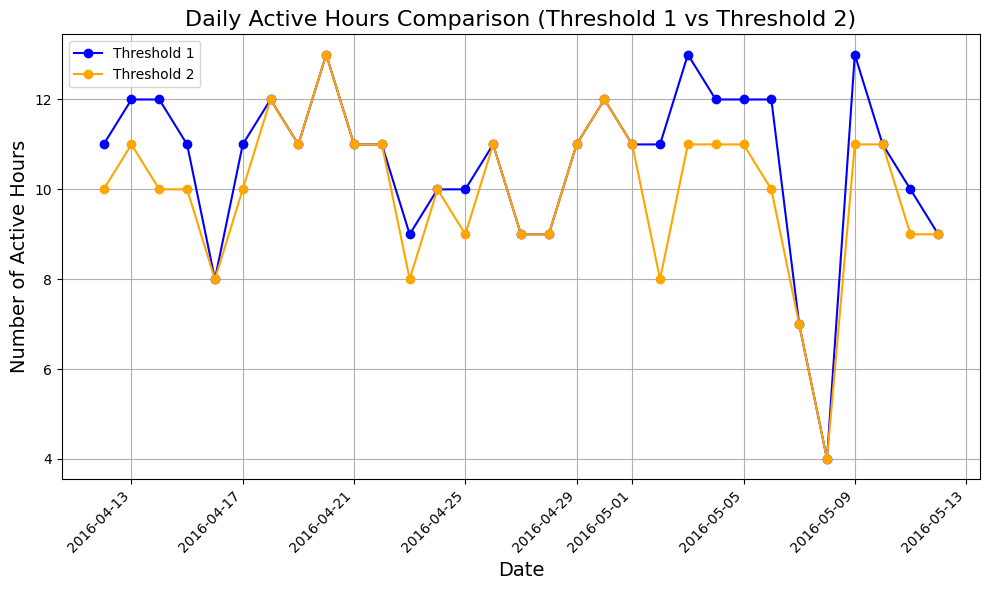

In [43]:
# Plot the line chart for comparison
plt.figure(figsize=(10, 6))
plt.plot(active_hours_t1.index, active_hours_t1.values, label='Threshold 1', marker='o', color='blue')
plt.plot(active_hours_t2.index, active_hours_t2.values, label='Threshold 2', marker='o', color='orange')

# Formatting the plot
plt.title('Daily Active Hours Comparison (Threshold 1 vs Threshold 2)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Active Hours', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Start date: 03/10/2024, End date: 03/10/2024 

From this Line plot, It clearly shows that Threshold 1 have the same or more active hours than Threshold 2 in all the dates as it excludes the sleeping time when calculating the threshold. The lower threshold will result in higher number of active hours because smaller step counts will be considered as active hours.

## Mean and Median Active Hours
Start date: 05/10/2024  
End date: 05/10/2024  
  
I will compute the mean and median of the active hours for both thresholds. These statistics will provide insights into the individual's overall activity levels across the days analyzed. By understanding the average and central tendencies of active hours, we can better assess whether the individual meets the inactivity avoidance criteria.
  
Prediction: Threshold 1 has higher mean and median active hour than threshold 2. 



In [58]:
# Calculate the mean and median active hours per day for both thresholds
mean_active_hours_t1 = active_hours_t1.mean()
median_active_hours_t1 = active_hours_t1.median()
mean_active_hours_t2 = active_hours_t2.mean()
median_active_hours_t2 = active_hours_t2.median()

# Print the results
print(f"Mean Active Hours for Threshold 1: {mean_active_hours_t1:.2f}")
print(f"Median Active Hours for Threshold 1: {median_active_hours_t1:.2f}")
print(f"Mean Active Hours for Threshold 2: {mean_active_hours_t2:.2f}")
print(f"Median Active Hours for Threshold 2: {median_active_hours_t2:.2f}")

# Start date: 05/10/2024, End date: 05/10/2024 

Mean Active Hours for Threshold 1: 10.61
Median Active Hours for Threshold 1: 11.0
Mean Active Hours for Threshold 2: 9.97
Median Active Hours for Threshold 2: 10.0


The analysis reveals the following active hours statistics:

- **Threshold 1**: The mean active hours are **10.61**, and the median is **11.00**. This indicates that the individual exceeds the inactivity threshold of 10 hours, suggesting a consistently active lifestyle when not accounting for sleeping hours.
  
- **Threshold 2**: The mean active hours drop slightly to **9.97**, with a median of **10.00**. While this is just under the inactivity threshold, the median suggests that on many days, the individual still meets the 10-hour criteria for activity. 


### Visualisation
Start date: 05/10/2024  
End date: 05/10/2024  
  
To visualise the mean and median of active hour, we can look at the distribution of this person's active hour using a box plot. 

Prediction: boxplot for threshold 1 will have higher IQR than theshold 2. 

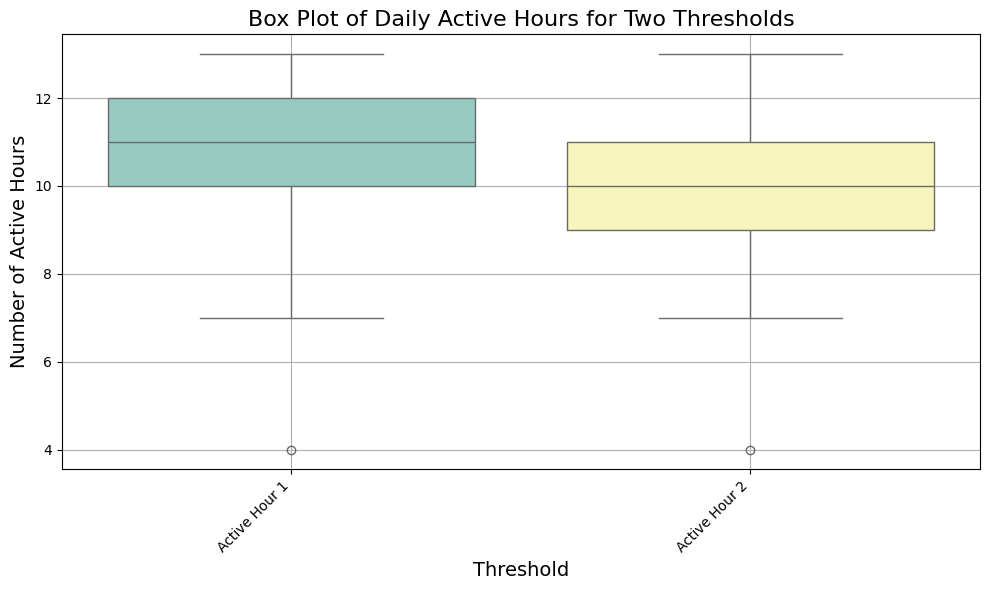

In [54]:
import seaborn as sns

# Prepare the data in long format
active_hours_long = active_hours_comparison.melt(id_vars='Date', 
                                                  value_vars=['Active Hour 1', 'Active Hour 2'], 
                                                  var_name='Threshold', 
                                                  value_name='Active Hours')

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=active_hours_long, x='Threshold', y='Active Hours', hue='Threshold', palette='Set3', legend=False)

# Formatting the plot
plt.title('Box Plot of Daily Active Hours for Two Thresholds', fontsize=16)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Number of Active Hours', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Start date: 05/10/2024, End date: 05/10/2024 

The box plot visually represents the distribution of daily active hours for both thresholds. 

- **Threshold 1**: The box plot shows that the majority of the individual's active hours are above the 10-hour threshold, with a median value that indicates consistent activity. The interquartile range (IQR) is relatively small, suggesting that the active hours are consistent across different days. However, there are a few outliers that indicate some days with significantly higher activity levels.

- **Threshold 2**: For this threshold, the box plot indicates a slightly lower median, reflecting that the individual sometimes falls below the 10-hour activity mark when considering sleeping hours. The presence of outliers still suggests there are days with high activity.


## Conclusion
Start date: 06/10/2024  
End date: 06/10/2024  
  

In this analysis, I explored the hourly activity data of an individual with ID 2022484408, focusing on whether this person avoid inactivity for at least 10 hours a day.   

### Missing Values: 
- There is no missing value for all the column in the hourly dataset. This was also checked in Checkpoint 1. 

### Determine Thresholds:  
Using the doctor recommendation of 5000 steps per day, I established two thresholds to analyze activity levels:  
- Threshold 1 considered only the active hours, excluding any sleeping time. It allowed for a clearer assessment of daytime activity levels, highlighting periods of motion and engagement.
- Threshold 2 included a sleeping period of 6 hours, providing a more holistic view of the individual's daily routine. It aimed to reflect realistic conditions that affect perceived activity levels.  
  
The line plot effectively illustrated the daily active hours, consistently favoring Threshold 1 over Threshold 2, underscoring the impact of not accounting for sleep on activity classification. But still need to discuss with the group and consider which one is the most appropriate. 
  
### Mean and Median Active Hour: 
- Threshold 1 revealed a mean active hour of 10.61 and a median of 11.00, demonstrating that the individual maintained a consistently active lifestyle, surpassing the 10-hour inactivity avoidance criterion.
- Threshold 2 exhibited a mean of 9.97 and a median of 10.00, suggesting that while the average falls slightly below the inactivity threshold, the individual often meets the 10-hour mark on many days.  
  
The box plot further highlighted the distribution of active hours, showing that while the individual generally exceeds the inactivity threshold, variability exists.